# Prueba #6: Gestión de datos con ElasticSearch y visualización con Matplotlib

## Dante Saavedra

### Cargar Dataset

#### Importaciones

In [2]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

import pandas as pd

import matplotlib.pyplot as plt

from pprint import pprint

import datetime

import json

import os

#### Crear indice en Elasticsearch

In [3]:
es = Elasticsearch()

if not(es.indices.exists(index="prueba_6")):
    res = es.indices.create(index="prueba_6")

files = os.listdir("tweets")
pprint(len(files))

354586


#### Cargar datos en Elasticsearch

In [6]:
tweets=[]
def cargarDatos():
    for filename in files:
        with open('tweets/'+filename) as f:
            try:
                tweet = json.load(f)
                timestamp = int(tweet["timestamp_ms"])
                simple_tweet = {
                    "timestamp":timestamp,
                    "date":tweet["created_at"],
                    "text": tweet['text'],
                    "username": tweet['user']['name'],
                    "location": tweet['user']['location']
                }
                tweets.append(simple_tweet) 
            except KeyError:
                error="error"



        #CARGAMOS LOS DATOS EN ELASTICSEARCH CON CONSULTAS 'BULK' PARA OPTIMIZAR EL PROCESO
        if (len(tweets)>=1000):
            i=0
            docs_as_string="["
            while i<1000:
                if i!=0:
                    docs_as_string = docs_as_string + ','
                docs_as_string = docs_as_string + '\n' + json.dumps(tweets[i])
                i=i+1
            docs_as_string=docs_as_string+"]"
            res = helpers.bulk(es, json.loads(docs_as_string),index="prueba_6", doc_type="_doc")
            tweets=[]

## Preguntas

### 1. En un histograma o en un line plot, visualizar el número de tweets conteniendo la palabra “goal”:

#### a) Cada Minuto

##### Función para convertir timestamp a time

In [4]:
def timestamp2date(x):
    y = datetime.datetime.fromtimestamp(x/1000).strftime('%H:%M:%S')
    return y

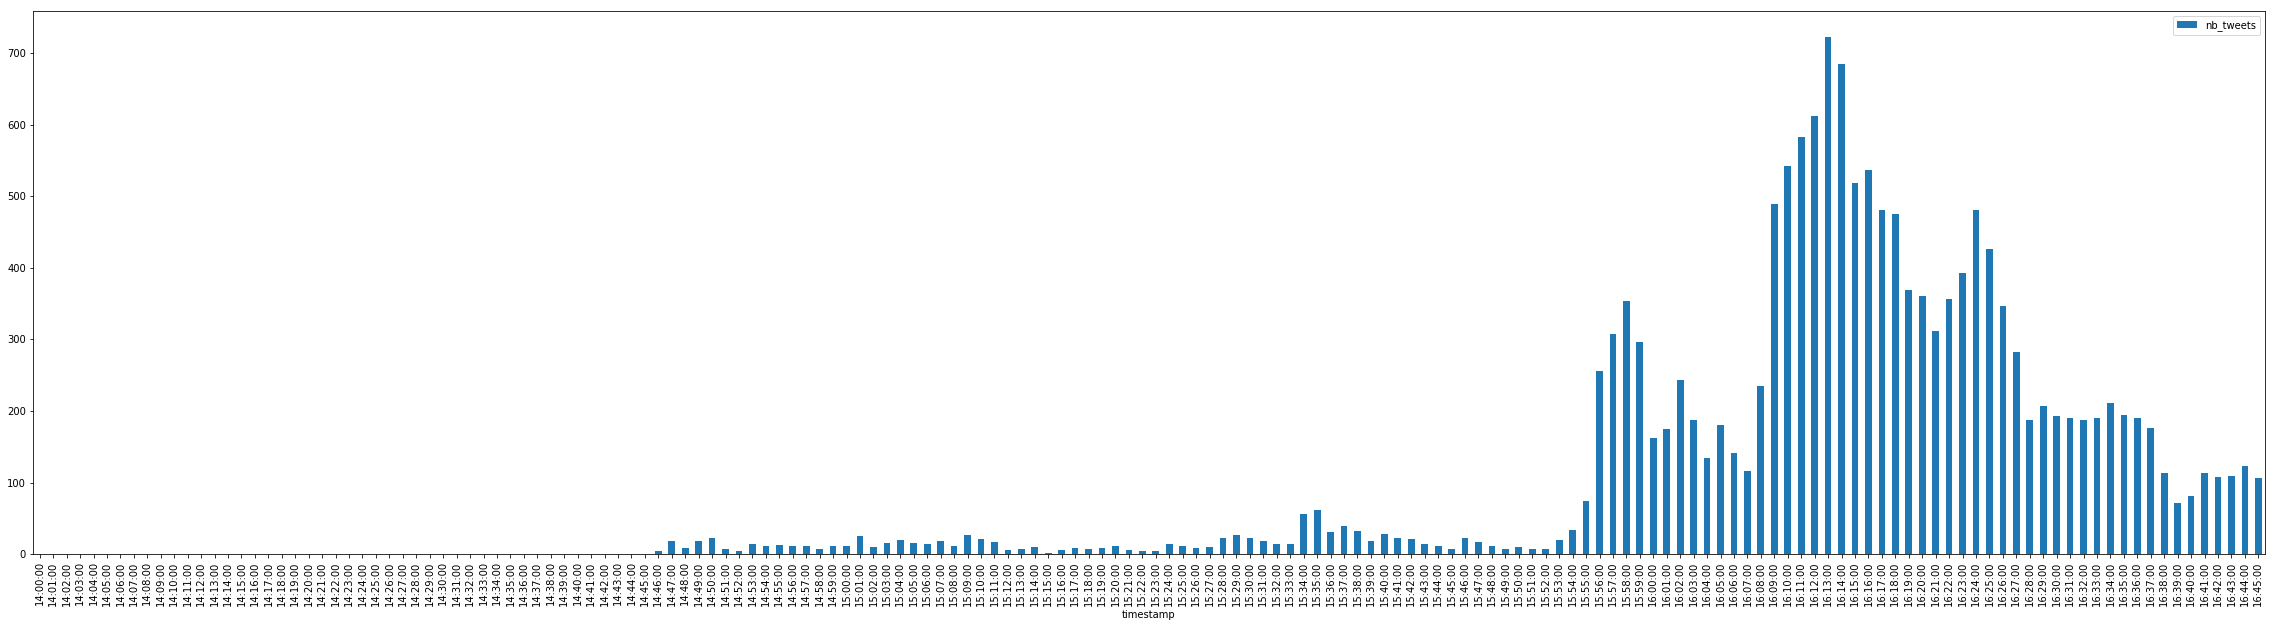

In [5]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"goal" #<----- Filtrar la palabra Goal
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minuto
                            }
                        }
                    }
                }) 
df_goalByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_goalByMinutes = df_goalByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_goalByMinutes_filtered = df_goalByMinutes.drop(df_goalByMinutes[df_goalByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_goalByMinutes_filtered['timestamp']=df_goalByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_goalByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) Cada 10 Minutos

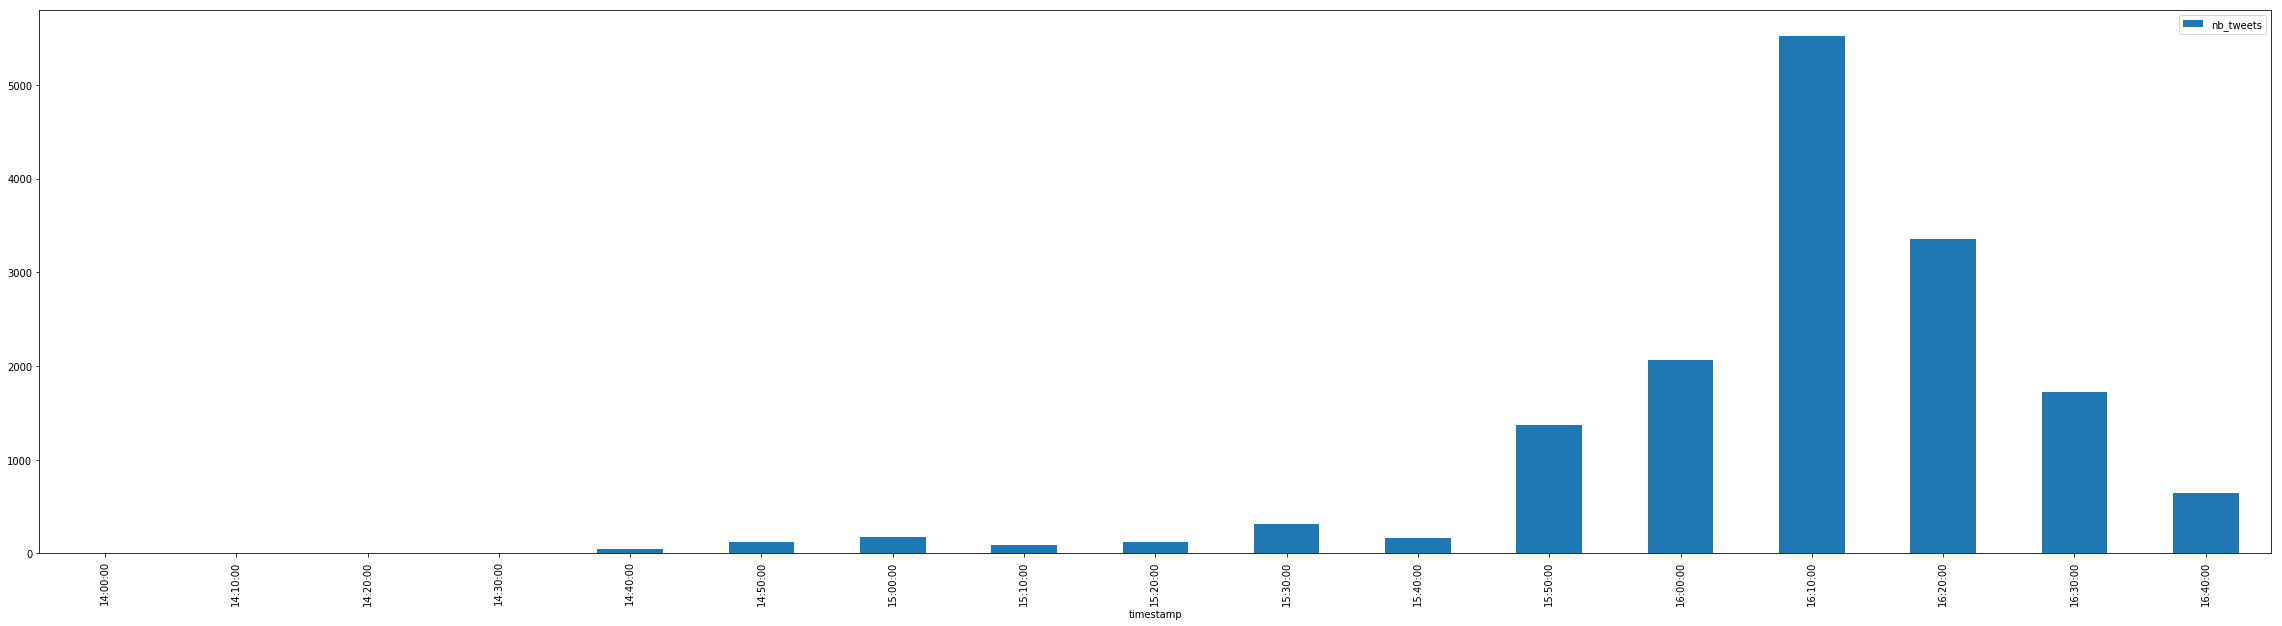

In [6]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"goal" #<----- Filtrar la palabra Goal 
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "10m" #<----- 10 Minutos
                            }
                        }
                    }
                }) 
df_goalBy10Minutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_goalBy10Minutes = df_goalBy10Minutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets'})
## Filtrar Datos
df_goalBy10Minutes_filtered = df_goalBy10Minutes.drop(df_goalBy10Minutes[df_goalBy10Minutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_goalBy10Minutes_filtered['timestamp']=df_goalBy10Minutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_goalBy10Minutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### Bonus: gestionar las variantes “goaaal”, “goooaallll”, etc. utilizando expresiones regulares

### 2. En un histograma o en un line plot, visualizar dos series de datos: 

#### a) El número de tweets que hablan de ‘liverpool’ por cada minuto.

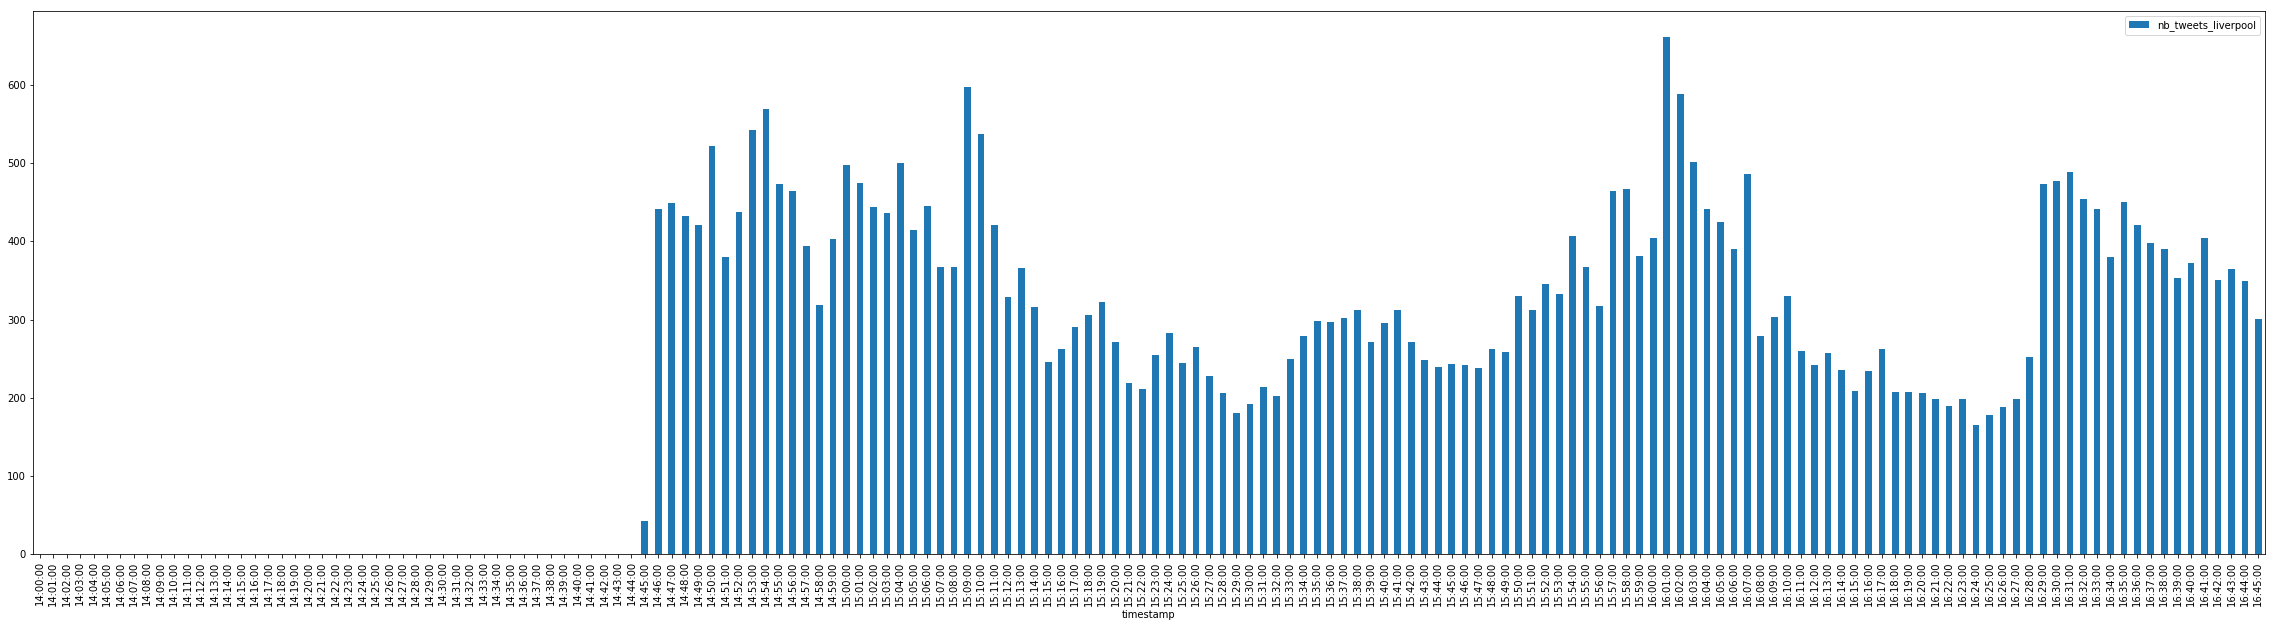

In [7]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"liverpool" #<----- Filtrar la palabra Liverpool
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_liverpoolByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_liverpoolByMinutes = df_liverpoolByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_liverpool'})
## Filtrar Datos
df_liverpoolByMinutes_filtered = df_liverpoolByMinutes.drop(df_liverpoolByMinutes[df_liverpoolByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_liverpoolByMinutes_filtered['timestamp']=df_liverpoolByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_liverpoolByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) El número de tweets que hablan de ‘madrid’ por cada minuto.

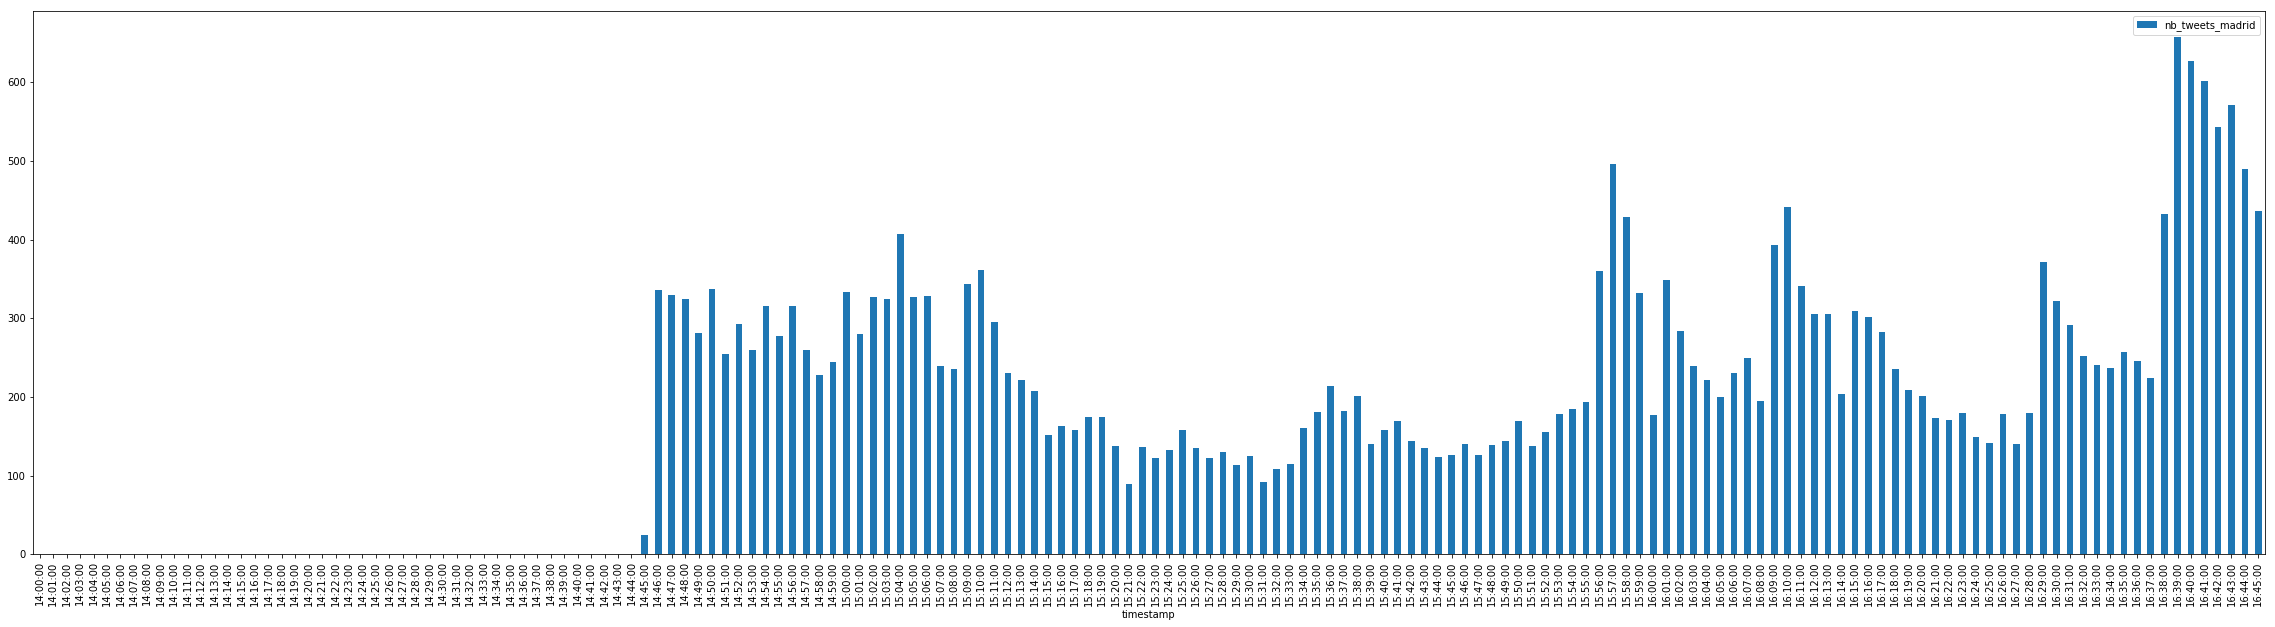

In [8]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "term":{
                            "text":"madrid" #<----- Filtrar la palabra Madrid
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_madridByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_madridByMinutes = df_madridByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_madrid'})
## Filtrar Datos
df_madridByMinutes_filtered = df_madridByMinutes.drop(df_madridByMinutes[df_madridByMinutes.timestamp < 1527357600000 ].index)
## Cambiar Dato timestamp a tipo date
df_madridByMinutes_filtered['timestamp']=df_madridByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_madridByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### c) ¿A qué minuto se habla más de Madrid?

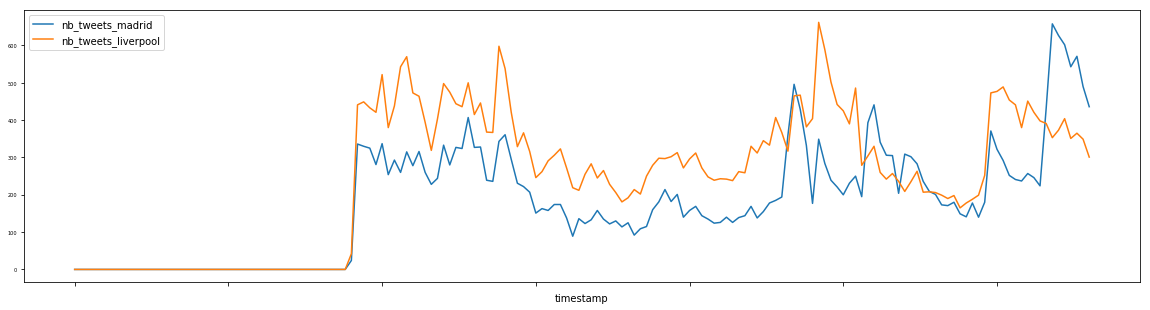

In [9]:
liverpoolmadrid = pd.concat([df_madridByMinutes_filtered, df_liverpoolByMinutes_filtered['nb_tweets_liverpool']], axis=1)
liverpoolmadrid.plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

##### Crear Columnas para ver en que minuto hay mas tweets en liverpool y en madrid

In [10]:
liverpoolmadrid.loc[:,'madridmayor'] = 0
liverpoolmadrid.loc[:,'liverpoolmayor'] = 0
for i,fila in liverpoolmadrid.iterrows():
    if( fila['nb_tweets_madrid'] > fila['nb_tweets_liverpool'] ):
        liverpoolmadrid.loc[i,'madridmayor'] = 1
    elif( fila['nb_tweets_madrid'] < fila['nb_tweets_liverpool'] ):
        liverpoolmadrid.loc[i,'liverpoolmayor'] = 1        

##### Minutos en que hay más tweet de madrid

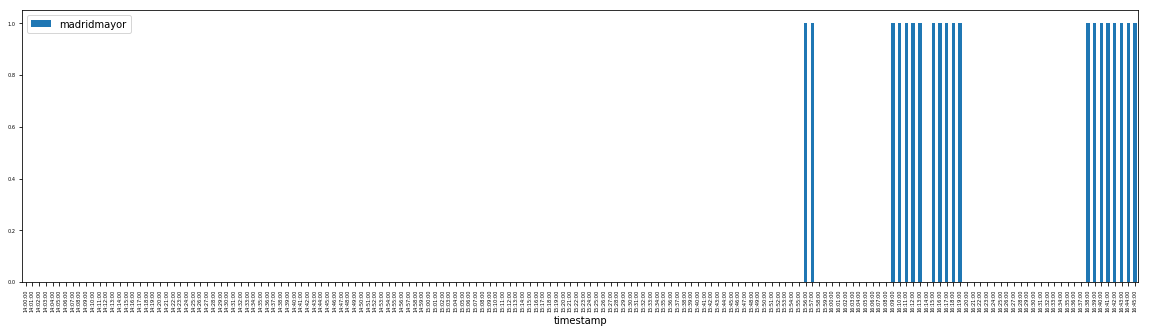

In [192]:
liverpoolmadrid[['madridmayor','timestamp']].plot(kind='bar', figsize=(20,5), fontsize=5, x='timestamp')

##### Minutos en que hay más tweets de liverpool

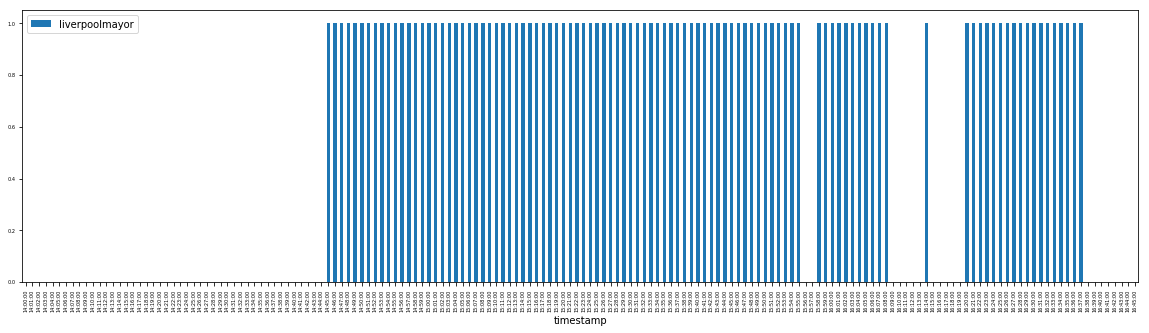

In [197]:
liverpoolmadrid[['liverpoolmayor','timestamp']].plot(kind='bar', figsize=(20,5), fontsize=5, x='timestamp')

##### Comparativa sobre en que minuto hay más tweets

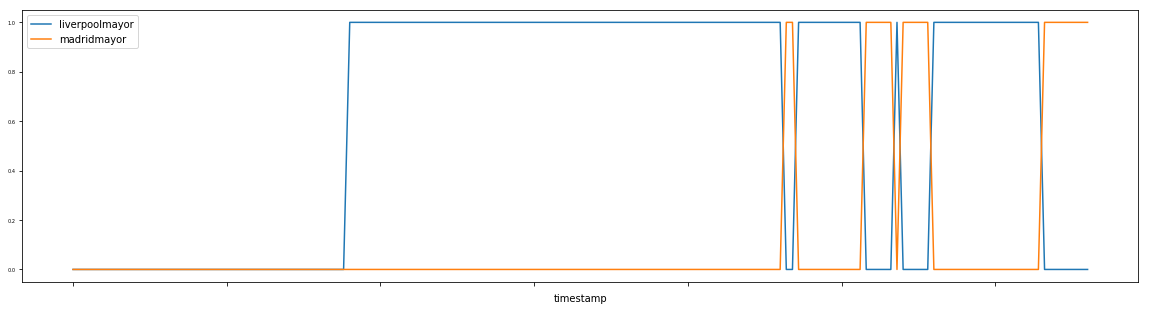

In [186]:
liverpoolmadrid[['liverpoolmayor','madridmayor','timestamp']].plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

### 3. En un dataframe, mostrar el número de tweets según el país indicado en el campo ‘location’.

#### ¿Desde cuáles países se enviaron los tweets?

In [105]:
res = es.search(index="prueba_6", 
                body={
                    "aggs": {
                        "locations": {
                            "terms": {
                                "field": "location.keyword",
                                'size': 354586
                            }
                        }
                    }
                })

df_locations = pd.DataFrame(res['aggregations']['locations']['buckets'])
df_locations

,doc_count,key
0,3275,"Lagos, Nigeria"
1,2381,Nigeria
2,1795,"London, England"
3,1624,"Nairobi, Kenya"
4,1534,South Africa
5,1325,"Johannesburg, South Africa"
6,1111,London
7,939,Brasil
8,935,United Kingdom
9,880,"Rio de Janeiro, Brasil"


#### BONUS: mostrar los resultados en una mapa

### 4. En un histograma o en un line plot, visualizar dos series de datos:

#### a) El número de tweets enviado desde Inglaterra, por cada minuto.

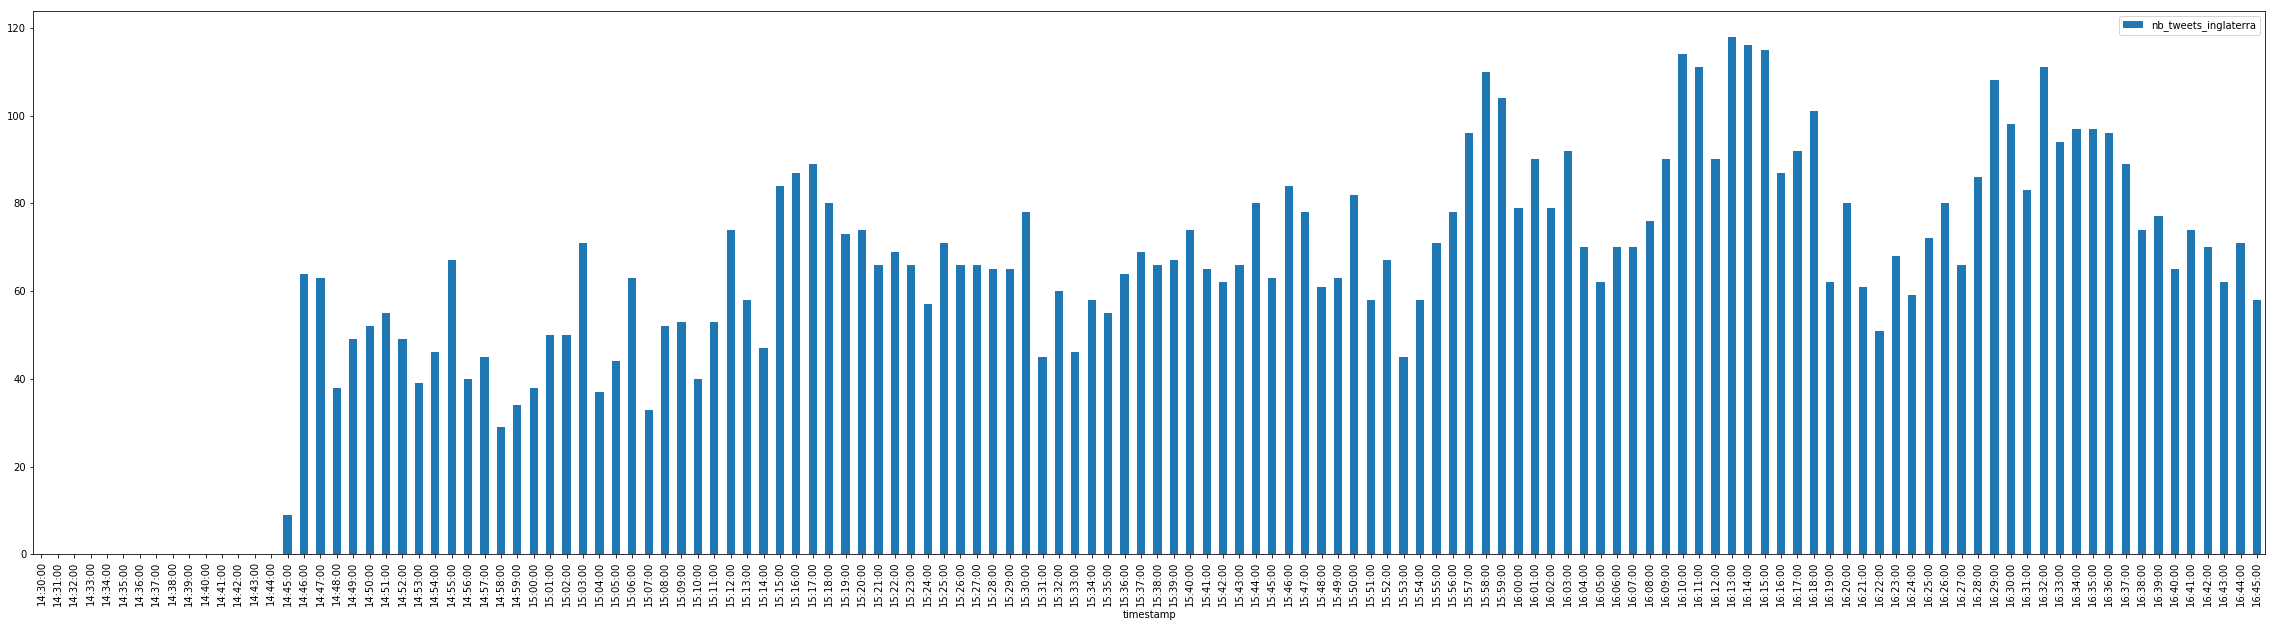

In [131]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "should" : [
                                { "term" : { "location" : "inglaterra" } },
                                { "term" : { "location" : "england" } },
                                { "term" : { "location" : "Inglaterra" } },
                                { "term" : { "location" : "England" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_inglaterraByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_inglaterraByMinutes = df_inglaterraByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_inglaterra'})
## Filtrar Datos
df_inglaterraByMinutes_filtered = df_inglaterraByMinutes.drop(df_inglaterraByMinutes[df_inglaterraByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_inglaterraByMinutes_filtered['timestamp']=df_inglaterraByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_inglaterraByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

#### b) El número de tweets enviado desde España, por cada minuto.

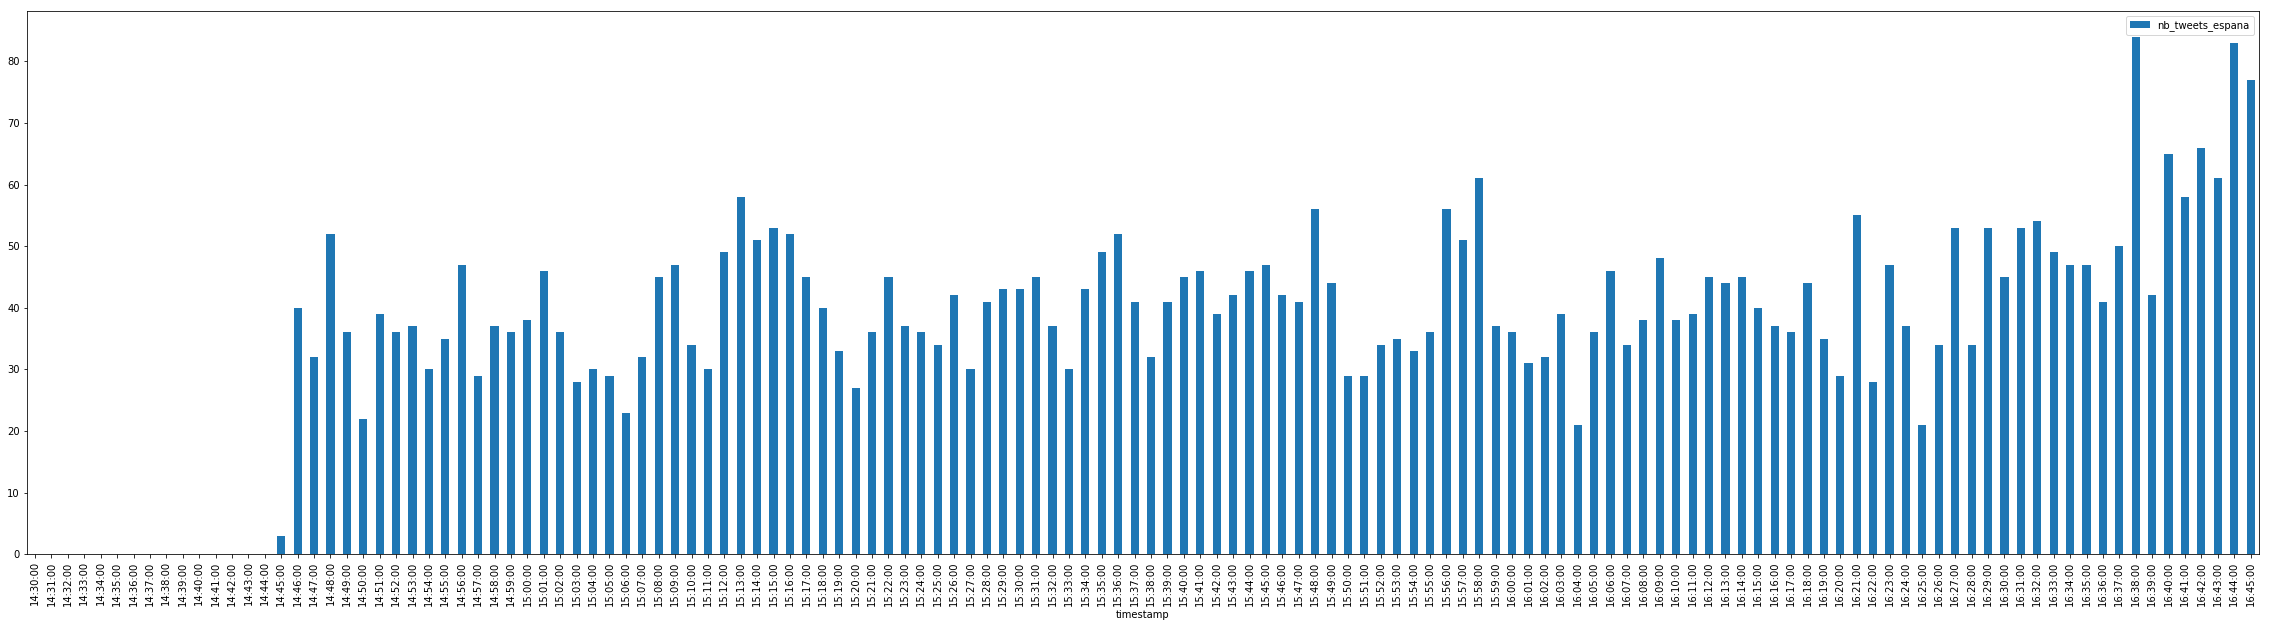

In [132]:
res = es.search(index="prueba_6", 
                body={
                    "query": {
                        "bool":{
                            "should" : [
                                { "term" : { "location" : "españa" } },
                                { "term" : { "location" : "spain" } },
                                { "term" : { "location" : "España" } },
                                { "term" : { "location" : "Spain" } },
                                { "term" : { "location" : "Espana" } },
                                { "term" : { "location" : "espana" } }
                              ]
                        }
                    },
                    "aggs" : { 
                        "tweets_over_time":{ 
                            "date_histogram":{ 
                                "field" :"timestamp", 
                                "interval" : "1m" #<----- 1 Minutos
                            }
                        }
                    }
                }) 
df_espanaByMinutes = pd.DataFrame(res['aggregations']['tweets_over_time']['buckets'])
df_espanaByMinutes = df_espanaByMinutes.rename(columns={'key': 'timestamp', 'doc_count': 'nb_tweets_espana'})
## Filtrar Datos
df_espanaByMinutes_filtered = df_espanaByMinutes.drop(df_espanaByMinutes[df_espanaByMinutes.timestamp < 1527359400000 ].index)
## Cambiar Dato timestamp a tipo date
df_espanaByMinutes_filtered['timestamp']=df_espanaByMinutes_filtered['timestamp'].apply(timestamp2date)
## Graficar
df_espanaByMinutes_filtered.plot(kind='bar',figsize=(40,10), fontsize=10, x='timestamp')
plt.show()

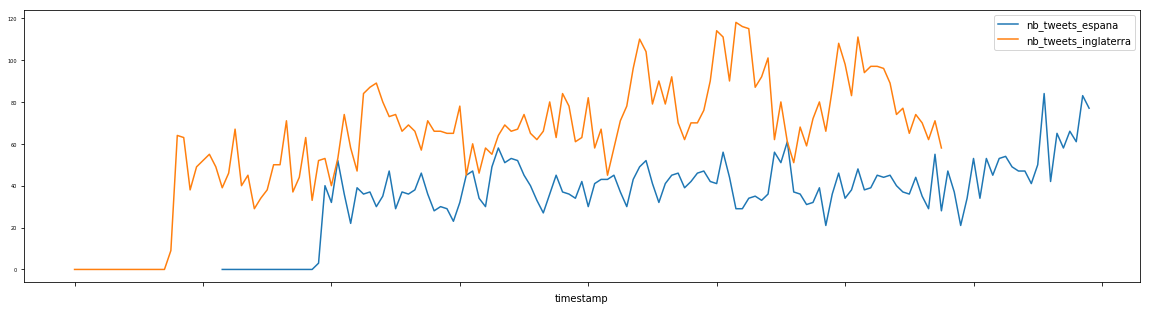

In [133]:
inglaterraespana = pd.concat([df_espanaByMinutes_filtered, df_inglaterraByMinutes_filtered['nb_tweets_inglaterra']], axis=1)
inglaterraespana.plot(kind='line', figsize=(20,5), fontsize=5, x='timestamp')

### 5. ¿Cómo podríamos analizar las emociones expresadas durante el partido? Proponer una metodología para responder a esta pregunta. (No es obligatorio implementar su metodología pero debe ser factible con las tecnologías que conocen).

Realizara dos listados:
* Adjetivos, Emojis y sustantivos calificativos __Positivos__
* Adjetivos, Emojis y sustantivos calificativos __Negativos__ 
Buscaría la incidencia de palabras de los tweet en cada una de las listas. Sí tiene más palabras pertenecientes al listado positivo, consideraría que el tweet es __emocionalmente positivo__, mientras que si contiene más palabras negativas consideraría que el tweet es __emocionalmente negativo__, en el caso que presente la misma cantidad de palabras positivas y negativas o no presente palabras en estos listados el tweet se considerara __emocionalmente neutro__.